<a href="https://colab.research.google.com/github/Y04ash/Diabetes-prediction/blob/main/diabetes_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [60]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner as kt
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential
import keras_tuner as kt
import pandas as pd

In [61]:
data = pd.read_csv('diabetes.csv')
x = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [69]:
def buildModel(hp):
  counter =0
  model = Sequential()

  for i in range(hp.Int('num_layers',min_value = 1, max_value = 10)):
    if counter == 0:
      model.add(Dense(hp.Int('units'+str(i), min_value = 8, max_value = 128, step= 8),
                      activation = hp.Choice('activation'+str(i), values = ['relu','sigmoid','tanh']),
                      input_dim = 8
      )
      )
      model.add(Dropout(hp.Choice('dropout'+str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
      model.add(Dense(hp.Int('units'+str(i), min_value = 8, max_value = 128, step= 8),
                      activation = hp.Choice('activation'+str(i), values = ['relu','sigmoid','tanh']),

      )
      )
      model.add(Dropout(hp.Choice('dropout'+str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter +=1
  model.add(Dense(1,activation = 'sigmoid'))
  model.compile(hp.Choice('optimizer',values = ['adam','nadam','sgd','rmsprop','adadelta']),
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy']
                    )
  return  model

In [70]:
tuner = kt.RandomSearch(
    buildModel,
    objective='val_accuracy',
    max_trials=5, # You can adjust the number of trials
    directory='my_dir1',
    project_name='my_project'
)

Reloading Tuner from my_dir1/my_project/tuner0.json


In [71]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test),verbose = 1)

In [72]:
params = tuner.get_best_hyperparameters()[0].values
print(params)

{'num_layers': 3, 'units0': 8, 'activation0': 'sigmoid', 'dropout0': 0.7, 'optimizer': 'nadam', 'units1': 56, 'activation1': 'sigmoid', 'dropout1': 0.8, 'units2': 48, 'activation2': 'sigmoid', 'dropout2': 0.2, 'units3': 32, 'activation3': 'relu', 'dropout3': 0.3, 'units4': 104, 'activation4': 'tanh', 'dropout4': 0.8, 'units5': 48, 'activation5': 'sigmoid', 'dropout5': 0.4, 'units6': 24, 'activation6': 'relu', 'dropout6': 0.3, 'units7': 104, 'activation7': 'relu', 'dropout7': 0.2, 'units8': 72, 'activation8': 'sigmoid', 'dropout8': 0.6, 'units9': 72, 'activation9': 'relu', 'dropout9': 0.6}


In [73]:
model = tuner.get_best_models(num_models =1)[0]



In [74]:

model.fit(x_train, y_train, epochs=200,initial_epoch = 6 ,validation_data=(x_test, y_test))

Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5534 - loss: 0.7059 - val_accuracy: 0.6429 - val_loss: 0.6541
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6397 - loss: 0.6538 - val_accuracy: 0.6429 - val_loss: 0.6559
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6192 - loss: 0.6799 - val_accuracy: 0.6429 - val_loss: 0.6535
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6461 - loss: 0.6513 - val_accuracy: 0.6429 - val_loss: 0.6545
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6632 - loss: 0.6484 - val_accuracy: 0.6429 - val_loss: 0.6574
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6441 - loss: 0.6617 - val_accuracy: 0.6429 - val_loss: 0.6535
Epoch 13/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6486 - loss: 0.6615 - val_accuracy: 0.6429 - val_loss: 0.6529
Epoch 14/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6563 - loss: 0.6482 - val_accuracy: 0.64

In [75]:
# Get the training history
history = model.history

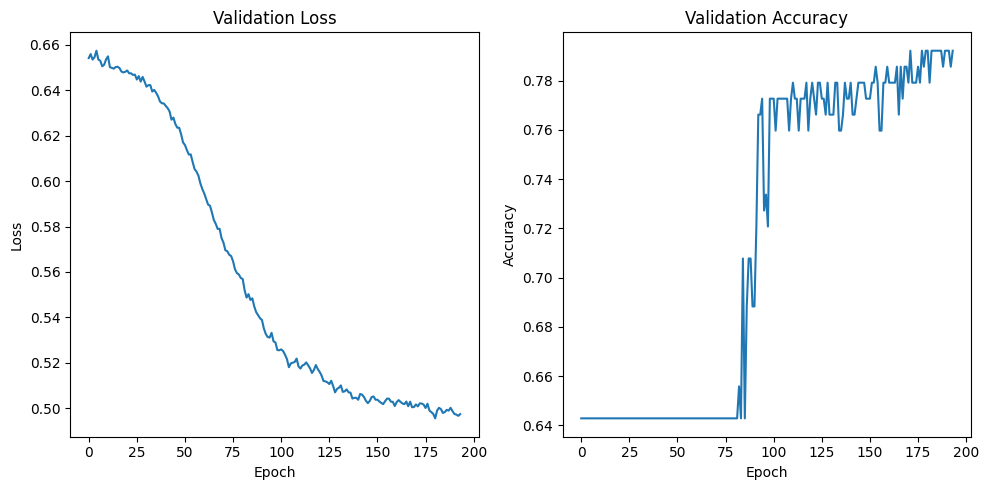

In [76]:

# Plot validation loss and accuracy
plt.figure(figsize=(10, 5))

# Plot validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [77]:

# Evaluate the model on the test data to get the final accuracy
_, final_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the final accuracy
print(f"Final Validation Accuracy: {final_accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8105 - loss: 0.4855
Final Validation Accuracy: 0.7922
